# Modeling

## Part 1: Preparing the Data

In [406]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [407]:
os.getcwd()

'/workspace'

In [408]:
data = pd.read_csv('Crime_Clean.csv')

In [409]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Total Laborforce,Total Unemployed,Start_Date_Time,Location,Longitude,Latitude,High School %,Bachelors %,Public Transportation %,Unemployed %
0,50,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,1067.0,31.0,12/06/2019 09:16:00 PM,"(39.2006, -77.1996)",-77.199620,39.200626,0.083714,0.270167,0.049515,0.029053
1,51,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,1067.0,31.0,04/13/2019 02:00:00 AM,"(39.1977, -77.1997)",-77.199669,39.197675,0.083714,0.270167,0.049515,0.029053
2,52,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,1067.0,31.0,03/13/2020 09:09:00 AM,"(39.2081, -77.1748)",-77.174806,39.208137,0.083714,0.270167,0.049515,0.029053
3,53,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,1067.0,31.0,11/15/2019 04:33:00 PM,"(39.2025, -77.1848)",-77.184766,39.202456,0.083714,0.270167,0.049515,0.029053
4,54,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,1067.0,31.0,07/22/2016 10:27:00 PM,"(39.205, -77.1643)",-77.164342,39.204973,0.083714,0.270167,0.049515,0.029053


In [410]:
len(data)

235368

In [411]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
High School %                0
Bachelors %                  0
Public Transportation %      0
Unemployed %                 0
dtype: int64

In [412]:
## Drop City column

data = data.drop('City',1)

In [413]:
##Exclude rows for which Crime Name1 is null

data = data[~data['Crime Name1'].isnull()]

In [414]:
data.isnull().sum()

Unnamed: 0                 0
Incident ID                0
Police District Name       0
Block                      0
Crime Name1                0
Crime Name2                0
Crime Name3                0
Victims                    0
Place                      0
Pop                        0
Income                     0
Age                        0
Educational Attainment     0
Bachelors                  0
High School                0
Means of Transportation    0
Public Transportation      0
Total Laborforce           0
Total Unemployed           0
Start_Date_Time            0
Location                   0
Longitude                  0
Latitude                   0
High School %              0
Bachelors %                0
Public Transportation %    0
Unemployed %               0
dtype: int64

In [415]:
## Exclude Other category from Analysis

data = data[data['Crime Name1'] != 'Other']

In [416]:
len(data)

187827

In [417]:
## Drop other unnecessary columns

data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed','Longitude','Latitude', 'Crime Name2'],1)

In [418]:
data['Crime Name3'].value_counts().loc[lambda x: x > 1000]

LARCENY - FROM AUTO                           20699
DRUGS - MARIJUANA - POSSESS                   14408
ASSAULT - 2ND DEGREE                          12724
LARCENY - SHOPLIFTING                         12145
DRIVING UNDER THE INFLUENCE LIQUOR            11747
LARCENY (DESCRIBE OFFENSE)                     9687
DAMAGE PROPERTY - PRIVATE                      9123
LARCENY - FROM BLDG                            8310
IDENTITY THEFT                                 4896
LIQUOR - POSSESS                               4411
PUBLIC PEACE - DISORDERLY CONDUCT              4318
AUTO THEFT - VEHICLE THEFT                     4149
LARCENY - AUTO PARTS                           4056
TRESPASSING                                    3378
FRAUD - ILLEGAL USE CREDIT CARDS               3358
DAMAGE PROPERTY (DESCRIBE OFFENSE)             3146
JUVENILE - RUNAWAY                             2817
ASSAULT - SIMPLE                               2792
BURGLARY - FORCED ENTRY-RESIDENTIAL            2710
FRAUD (DESCR

In [419]:
data.columns

Index(['Incident ID', 'Police District Name', 'Block', 'Crime Name1',
       'Crime Name3', 'Victims', 'Place', 'Pop', 'Income', 'Age',
       'Start_Date_Time', 'Location', 'High School %', 'Bachelors %',
       'Public Transportation %', 'Unemployed %'],
      dtype='object')

In [420]:
data.shape

(187827, 16)

In [421]:
data['Place'].value_counts().loc[lambda x: x > 1000]

Street - In vehicle                   27251
Residence - Single Family             14706
Residence - Apartment/Condo           14260
Street - Residential                  13815
Other/Unknown                         11922
Parking Lot - Residential             11026
Residence - Driveway                   8425
Parking Lot - Commercial               7536
Residence -Townhouse/Duplex            6935
Retail - Department/Discount Store     5918
Street - Commercial                    5208
School/College                         4215
Retail - Mall                          4067
Restaurant                             3883
Grocery/Supermarket                    3748
Street - Other                         3503
Retail - Other                         2798
Residence - Other                      2535
Convenience Store                      2267
Residence - Yard                       2140
Commercial - Office Building           2024
Parking Garage - Residential           1690
Street - Bus Stop               

In [422]:
data['Crime Name1'].value_counts()

Crime Against Property    103669
Crime Against Society      59437
Crime Against Person       21904
Not a Crime                 2817
Name: Crime Name1, dtype: int64

In [423]:
data= data[data['Crime Name1'] != 'Not a Crime']

In [424]:
data.shape

(185010, 16)

In [425]:
## Create new, less general crime categories based on EDA rather than NIBRS crime classifications

import re

pattern1 = r'.*\s*(ASSAULT|RAPE|BLDG|OBSTRUCT GOVT|SEX|FAMILY|FORCED|COMMUNICATION|TRESPASSING|LARCENY \(DESCRIBE OFFENSE\))\.*'
pattern2 = r'.*\s*(DRUGS|INFLUENCE|LIQUOR|OBSTRUCT POLICE|WEAPON)\.*'
pattern3 = r'.*\s*(FRAUD|IDENTITY|FORGERY|EMBEZZLE)\.*'
pattern4 = r'.*\s*(DAMAGE PROPERTY|AUTO|DISORDERLY CONDUCT|ROBBERY)\.*'
pattern5 = r'.*\s*(SHOPLIFTING|MALLS|POCKET|PURSE|COUNTERFEITING)\.*'

for i, rowseries in data.iterrows():
    if re.match(pattern1, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Assault/Burglary/Residential Theft'
    elif re.match(pattern2, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Drugs/DUI/Weapon'
    elif re.match(pattern3, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Fraud'
    elif re.match(pattern4, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Auto Theft/Property Damage/Robbery/Disorderly Conduct'
    elif re.match(pattern5, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Theft from Store/Pocket Picking/Counterfeit'
    else:
        data.at[i,'Crime Type'] = 'All Other Offenses'


In [426]:
data['Crime Type'].value_counts()

Assault/Burglary/Residential Theft                       53424
Auto Theft/Property Damage/Robbery/Disorderly Conduct    50067
Drugs/DUI/Weapon                                         44788
Fraud                                                    16871
Theft from Store/Pocket Picking/Counterfeit              13932
All Other Offenses                                        5928
Name: Crime Type, dtype: int64

In [427]:
rand = data[['Crime Name3','Crime Type']]
rand = data[data['Crime Type'] == 'All Other Offenses']
rand['Crime Name3'].value_counts().loc[lambda x: x > 100]

ALL OTHER OFFENSES                                   1339
UNAUTHORIZED USE OF VEHICLE (INCLUDES JOY RIDING)     740
LARCENY - POSTAL                                      499
LARCENY - FROM YARDS                                  462
BURGLARY (DESCRIBE OFFENSE)                           390
FUGITIVE FROM JUSTICE (OUT OF STATE)                  279
FUGITIVE FROM MD JURISDICTION                         259
STOLEN VEHICLE (DESCRIBE OFFENSE)                     218
PUBLIC PEACE (DESCRIBE OFFENSE)                       174
ARSON - BURNING OF - (IDENTIFY OBJECT)                104
Name: Crime Name3, dtype: int64

In [428]:
data = data[data['Crime Type'] != 'All Other Offenses']
data['Crime Type'].value_counts()

Assault/Burglary/Residential Theft                       53424
Auto Theft/Property Damage/Robbery/Disorderly Conduct    50067
Drugs/DUI/Weapon                                         44788
Fraud                                                    16871
Theft from Store/Pocket Picking/Counterfeit              13932
Name: Crime Type, dtype: int64

In [429]:
classes_gen = data['Crime Name1'].value_counts()

top_classes_gen = list(classes_gen.index.values)

top_classes_gen = sorted(top_classes_gen)
top_classes_gen

['Crime Against Person', 'Crime Against Property', 'Crime Against Society']

In [430]:
classes_spec = data['Crime Type'].value_counts()

top_classes_spec = list(classes_spec.index.values)

top_classes_spec = sorted(top_classes_spec)
top_classes_spec

['Assault/Burglary/Residential Theft',
 'Auto Theft/Property Damage/Robbery/Disorderly Conduct',
 'Drugs/DUI/Weapon',
 'Fraud',
 'Theft from Store/Pocket Picking/Counterfeit']

In [431]:
num_classes_gen = len(np.unique(top_classes_gen))
num_classes_spec = len(np.unique(top_classes_spec))

In [433]:
## Create 3 different subsets of places: 1. places with over 1000 crimes 2. places with over 3000 crimes 3. places with over 5000 crimes
## Create 3 different datasets based on subsetting the dataset according to each place subset

places1 = data['Place'].value_counts().loc[lambda x: x > 0]
places2 = data['Place'].value_counts().loc[lambda x: x > 3000]
places3 = data['Place'].value_counts().loc[lambda x: x > 5000]


top_places1 = list(places1.index.values)
top_places2 = list(places2.index.values)
top_places3 = list(places3.index.values)

data1 = data[data['Place'].isin(top_places1)]
data2 = data[data['Place'].isin(top_places2)]
data3 = data[data['Place'].isin(top_places3)]

In [486]:
data1['Crime Name1'].value_counts()

Crime Against Property    101245
Crime Against Society      56056
Crime Against Person       21781
Name: Crime Name1, dtype: int64

In [487]:
data2['Crime Name1'].value_counts()

Crime Against Property    75929
Crime Against Society     46339
Crime Against Person      17480
Name: Crime Name1, dtype: int64

In [488]:
data3['Crime Name1'].value_counts()

Crime Against Property    65523
Crime Against Society     40471
Crime Against Person      15011
Name: Crime Name1, dtype: int64

In [489]:
data1['Crime Type'].value_counts()

Assault/Burglary/Residential Theft                       53424
Auto Theft/Property Damage/Robbery/Disorderly Conduct    50067
Drugs/DUI/Weapon                                         44788
Fraud                                                    16871
Theft from Store/Pocket Picking/Counterfeit              13932
Name: Crime Type, dtype: int64

In [490]:
data2['Crime Type'].value_counts()

Auto Theft/Property Damage/Robbery/Disorderly Conduct    40521
Drugs/DUI/Weapon                                         38825
Assault/Burglary/Residential Theft                       37344
Fraud                                                    13917
Theft from Store/Pocket Picking/Counterfeit               9141
Name: Crime Type, dtype: int64

In [491]:
data3['Crime Type'].value_counts()

Auto Theft/Property Damage/Robbery/Disorderly Conduct    37948
Drugs/DUI/Weapon                                         34849
Assault/Burglary/Residential Theft                       30279
Fraud                                                    13457
Theft from Store/Pocket Picking/Counterfeit               4472
Name: Crime Type, dtype: int64

In [434]:
## One-hot encode Place and Police District Variables

data1 = pd.get_dummies(data1, prefix = ['Place','Police District Name'], columns = ['Place','Police District Name'])
data2 = pd.get_dummies(data2, prefix = ['Place','Police District Name'], columns = ['Place','Police District Name'])
data3 = pd.get_dummies(data3, prefix = ['Place','Police District Name'], columns = ['Place','Police District Name'])

In [435]:
## Get features for each dataset

features1 = data1[data1.columns[~data1.columns.isin(['Incident ID','Block','Crime Name3','Crime Name1','Crime Type','Location','Start_Date_Time'])]]
features2 = data2[data2.columns[~data2.columns.isin(['Incident ID','Block','Crime Name3','Crime Name1','Crime Type','Location','Start_Date_Time'])]]
features3 = data3[data3.columns[~data3.columns.isin(['Incident ID','Block','Crime Name3','Crime Name1','Crime Type','Location','Start_Date_Time'])]]

In [436]:
## Binzarize the target variable for each dataset

from sklearn import preprocessing

labels_gen1 = preprocessing.label_binarize(data1['Crime Name1'], classes=top_classes_gen)
labels_spec1 = preprocessing.label_binarize(data1['Crime Type'], classes=top_classes_spec)

labels_gen2 = preprocessing.label_binarize(data2['Crime Name1'], classes=top_classes_gen)
labels_spec2 = preprocessing.label_binarize(data2['Crime Type'], classes=top_classes_spec)

labels_gen3 = preprocessing.label_binarize(data3['Crime Name1'], classes=top_classes_gen)
labels_spec3 = preprocessing.label_binarize(data3['Crime Type'], classes=top_classes_spec)


In [437]:
## Create training and testing data for each dataset

from sklearn.model_selection import train_test_split

train_gen1, test_gen1, train_labels_gen1, test_labels_gen1 = train_test_split(features1,labels_gen1,test_size=0.25,random_state=4)

train_gen2, test_gen2, train_labels_gen2, test_labels_gen2 = train_test_split(features2,labels_gen2,test_size=0.25,random_state=4)

train_gen3, test_gen3, train_labels_gen3, test_labels_gen3 = train_test_split(features3,labels_gen3,test_size=0.25,random_state=4)



train_spec1, test_spec1, train_labels_spec1, test_labels_spec1 = train_test_split(features1,labels_spec1,test_size=0.25,random_state=4)

train_spec2, test_spec2, train_labels_spec2, test_labels_spec2 = train_test_split(features2,labels_spec2,test_size=0.25,random_state=4)

train_spec3, test_spec3, train_labels_spec3, test_labels_spec3 = train_test_split(features3,labels_spec3,test_size=0.25,random_state=4)


In [438]:
## Baseline/Dummy Model

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

## Part 2: Predicting Crimes Against Society, Persons, and Property

In [ ]:
## Plot Target Varaibles Class Distribution

plt.hist(train_labels_gen1, bins=20)
plt.show()

In [ ]:
## Correct for Class Imbalance using SMOTE

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=4)

X_sm, y_sm = smote.fit_resample(train_gen1, train_labels_gen1)

In [ ]:
plt.hist(y_sm, bins=20)
plt.show()

In [ ]:
## Correct for Class Imbalance by Oversampling Minority Class

smote2 = SMOTE('minority')

X_sm2, y_sm2 = smote2.fit_resample(train_gen1, train_labels_gen1)

In [ ]:
plt.hist(y_sm2, bins=20)
plt.show()

In [ ]:
## Correct for Class Imbalance by Undersampling from Majority Class

under = RandomUnderSampler('majority')

X_u, Y_u = under.fit_resample(train_gen1, train_labels_gen1)

In [ ]:
plt.hist(Y_u, bins=20)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,
                               random_state=4,
                               max_features='sqrt',
                               n_jobs=-1, verbose=1)

In [ ]:
model.fit(train_gen1, train_labels_gen1)

predictions = model.predict(test_gen1)

print("Accuracy of Imbalanced Data: " + str(accuracy_score(test_labels_gen1, predictions)))

In [ ]:
model.fit(X_sm,y_sm)

predictions = model.predict(test_gen1)

print('Accuracy of SMOTE Balanced Data: ' + str(accuracy_score(test_labels_gen1, predictions)))

In [ ]:
model2.fit(X_sm2,y_sm2)

predictions = model.predict(test_gen1)

print('Accuracy of Minority Oversampled Data: ' + str(accuracy_score(test_labels_gen1, predictions)))

In [ ]:
model2.fit(X_u, Y_u)

predictions = model.predict(test_gen1)

print('Accuracy of Majority Undersampled Data: ' + str(accuracy_score(test_labels_gen1, predictions)))

### Part 2A: All Places

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')

scores = evaluate_model(test_gen1, test_labels_gen1, dummy)
print('Mean Accuracy:' + str(np.mean(scores)))

In [439]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': [None] + list(np.linspace(3,20).astype(int)),
    'max_features': ['auto','sqrt', None] + list(np.arange(0.5,1,0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10,50,500).astype(int)),
    'min_samples_split': [2,5,10],
    'bootstrap': [True,False]
}

estimator = RandomForestClassifier(random_state=4)

rs = RandomizedSearchCV(estimator, param_grid, n_jobs= -1,cv=3,
                       n_iter = 10, verbose = 1, random_state=4)

rs.fit(train_gen1, train_labels_gen1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                      

In [440]:
print(rs.best_params_)

{'n_estimators': 83, 'min_samples_split': 5, 'max_leaf_nodes': 45, 'max_features': 0.7999999999999999, 'max_depth': 4, 'bootstrap': True}


In [441]:
best_model_gen1 = rs.best_estimator_

In [515]:
from sklearn.multiclass import OneVsRestClassifier

ovr_best_model_gen1 = OneVsRestClassifier(best_model_gen1)

In [516]:
ovr_best_model_gen1.fit(train_gen1,train_labels_gen1)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=4,
                                                     max_features=0.7999999999999999,
                                                     max_leaf_nodes=45,
                                                     min_samples_split=5,
                                                     n_estimators=83,
                                                     random_state=4))

In [520]:
predictions_gen1 = ovr_best_model_gen1.predict(test_gen1)
accuracy_score(test_labels_gen1, predictions_gen1)

0.712581805186393

In [521]:
predictions_gen1 = ovr_best_model_gen1.predict_proba(test_gen1)

In [557]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision_gen1 = dict()
recall_gen1 = dict()
average_precision_gen1 = dict()
for i in range(len(top_classes_gen)):
    precision_gen1[i], recall_gen1[i], _ = precision_recall_curve(test_labels_gen1[:, i],
                                                        predictions_gen1[:, i])
    average_precision_gen1[i] = average_precision_score(test_labels_gen1[:, i], predictions_gen1[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_gen1["micro"], recall_gen1["micro"], _ = precision_recall_curve(test_labels_gen1.ravel(),
    predictions_gen1.ravel())
average_precision_gen1["micro"] = average_precision_score(test_labels_gen1, predictions_gen1,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_gen1["micro"]))

Average precision score, micro-averaged over all classes: 0.75


In [523]:
from sklearn.metrics import roc_auc_score

macro_roc_auc_ovo = roc_auc_score(test_labels_gen1, predictions_gen1, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(test_labels_gen1, predictions_gen1, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(test_labels_gen1, predictions_gen1, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(test_labels_gen1, predictions_gen1, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.784477 (macro),
0.783206 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.784477 (macro),
0.783206 (weighted by prevalence)


### Part 2B: Places with 3000+ Crimes

In [454]:
rs.fit(train_gen2, train_labels_gen2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                      

In [455]:
print(rs.best_params_)

{'n_estimators': 83, 'min_samples_split': 5, 'max_leaf_nodes': 45, 'max_features': 0.7999999999999999, 'max_depth': 4, 'bootstrap': True}


In [456]:
best_model_gen2 = rs.best_estimator_

In [526]:
ovr_best_model_gen2 = OneVsRestClassifier(best_model_gen2)

ovr_best_model_gen2.fit(train_gen2,train_labels_gen2)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=4,
                                                     max_features=0.7999999999999999,
                                                     max_leaf_nodes=45,
                                                     min_samples_split=5,
                                                     n_estimators=83,
                                                     random_state=4))

In [527]:
predictions_gen2 = ovr_best_model_gen2.predict(test_gen2)
accuracy_score(test_labels_gen2, predictions_gen2)

0.7360105332455563

In [528]:
predictions_gen2 = ovr_best_model_gen2.predict_proba(test_gen2)

In [558]:
# For each class
precision_gen2 = dict()
recall_gen2 = dict()
average_precision_gen2 = dict()
for i in range(len(top_classes_gen)):
    precision_gen2[i], recall_gen2[i], _ = precision_recall_curve(test_labels_gen2[:, i],
                                                        predictions_gen2[:, i])
    average_precision_gen2[i] = average_precision_score(test_labels_gen2[:, i], predictions_gen2[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_gen2["micro"], recall_gen2["micro"], _ = precision_recall_curve(test_labels_gen2.ravel(),
    predictions_gen2.ravel())
average_precision_gen2["micro"] = average_precision_score(test_labels_gen2, predictions_gen2,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_gen2["micro"]))

Average precision score, micro-averaged over all classes: 0.79


In [530]:
macro_roc_auc_ovo = roc_auc_score(test_labels_gen2, predictions_gen2, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(test_labels_gen2, predictions_gen2, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(test_labels_gen2, predictions_gen2, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(test_labels_gen2, predictions_gen2, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.831085 (macro),
0.833664 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.831085 (macro),
0.833664 (weighted by prevalence)


### Part 2C: Places with 5000+ Crimes

In [571]:
rs.fit(train_gen3, train_labels_gen3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                      

In [572]:
print(rs.best_params_)

{'n_estimators': 83, 'min_samples_split': 5, 'max_leaf_nodes': 45, 'max_features': 0.7999999999999999, 'max_depth': 4, 'bootstrap': True}


In [573]:
best_model_gen3 = rs.best_estimator_

In [574]:
ovr_best_model_gen3 = OneVsRestClassifier(best_model_gen3)
ovr_best_model_gen3.fit(train_gen3,train_labels_gen3)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=4,
                                                     max_features=0.7999999999999999,
                                                     max_leaf_nodes=45,
                                                     min_samples_split=5,
                                                     n_estimators=83,
                                                     random_state=4))

In [575]:
predictions_gen3 = ovr_best_model_gen3.predict(test_gen3)
accuracy_score(test_labels_gen3, predictions_gen3)

0.7628255983075499

In [576]:
predictions_gen3 = ovr_best_model_gen3.predict_proba(test_gen3)

In [559]:
# For each class
precision_gen3 = dict()
recall_gen3 = dict()
average_precision_gen3 = dict()
for i in range(len(top_classes_gen)):
    precision_gen3[i], recall_gen3[i], _ = precision_recall_curve(test_labels_gen3[:, i],
                                                        predictions_gen3[:, i])
    average_precision_gen3[i] = average_precision_score(test_labels_gen3[:, i], predictions_gen3[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_gen3["micro"], recall_gen3["micro"], _ = precision_recall_curve(test_labels_gen3.ravel(),
    predictions_gen3.ravel())
average_precision_gen3["micro"] = average_precision_score(test_labels_gen3, predictions_gen3,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_gen3["micro"]))

Average precision score, micro-averaged over all classes: 0.82


In [535]:
macro_roc_auc_ovo = roc_auc_score(test_labels_gen3, predictions_gen3, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(test_labels_gen3, predictions_gen3, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(test_labels_gen3, predictions_gen3, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(test_labels_gen3, predictions_gen3, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.858520 (macro),
0.864688 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.858520 (macro),
0.864688 (weighted by prevalence)


## Part 3: Can we Predict more Specific Crimes more Accurately? 

In [ ]:
## Plot Target Variable Class Distribution
plt.hist(train_labels_spec1, bins=20)
plt.show()

In [ ]:
## Correct for Class Imbalance using SMOTE

X_sm, y_sm = smote.fit_resample(train_spec1, train_labels_spec1)

In [ ]:
plt.hist(y_sm, bins=20)
plt.show()

In [ ]:
## Correct for Class Imbalance by Oversampling Minority Class

X_sm2, y_sm2 = smote2.fit_resample(train_spec1, train_labels_spec1)

In [ ]:
plt.hist(y_sm2, bins=20)
plt.show()

In [ ]:
## Correct for Class Imbalance by Undersampling from Majority Class

X_u, Y_u = under.fit_resample(train_spec1, train_labels_spec1)

In [ ]:
plt.hist(Y_u, bins=20)
plt.show()

In [ ]:
model.fit(train_spec1,train_labels_spec1)

predictions = model.predict(test_spec1)

print("Accuracy of Imbalanced Data: " + str(accuracy_score(test_labels_spec1, predictions)))

In [ ]:
model.fit(X_sm,y_sm)

predictions = model.predict(test_spec1)

print('Accuracy of SMOTE Balanced Data: ' + str(accuracy_score(test_labels_spec1, predictions)))

In [ ]:
model.fit(X_sm2,y_sm2)

predictions = model.predict(test_spec1)

print('Accuracy of Minority Oversampled Data: ' + str(accuracy_score(test_labels_spec1, predictions)))

In [ ]:
model.fit(X_u, Y_u)

predictions = model.predict(test_spec1)

print('Accuracy of Majority Undersampled Data: ' + str(accuracy_score(test_labels_spec1, predictions)))

### Part 3A: All Places

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')

scores = evaluate_model(test_spec1, test_labels_spec1, dummy)
print('Mean Accuracy:' + str(np.mean(scores)))

In [447]:
rs.fit(train_spec1, train_labels_spec1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                      

In [448]:
print(rs.best_params_)

{'n_estimators': 110, 'min_samples_split': 10, 'max_leaf_nodes': 37, 'max_features': None, 'max_depth': 19, 'bootstrap': False}


In [449]:
best_model_spec1 = rs.best_estimator_

In [536]:
ovr_best_model_spec1 = OneVsRestClassifier(best_model_spec1)
ovr_best_model_spec1.fit(train_spec1,train_labels_spec1)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                     max_depth=19,
                                                     max_features=None,
                                                     max_leaf_nodes=37,
                                                     min_samples_split=10,
                                                     n_estimators=110,
                                                     random_state=4))

In [537]:
predictions_spec1 = ovr_best_model_spec1.predict(test_spec1)
accuracy_score(test_labels_spec1, predictions_spec1)

0.6166044984476559

In [538]:
predictions_spec1 = ovr_best_model_spec1.predict_proba(test_spec1)

In [561]:
# For each class
precision_spec1 = dict()
recall_spec1 = dict()
average_precision_spec1 = dict()
for i in range(len(top_classes_spec)):
    precision_spec1[i], recall_spec1[i], _ = precision_recall_curve(test_labels_spec1[:, i],
                                                        predictions_spec1[:, i])
    average_precision_spec1[i] = average_precision_score(test_labels_spec1[:, i], predictions_spec1[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_spec1["micro"], recall_spec1["micro"], _ = precision_recall_curve(test_labels_spec1.ravel(),
    predictions_spec1.ravel())
average_precision_spec1["micro"] = average_precision_score(test_labels_spec1, predictions_spec1,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_spec1["micro"]))

Average precision score, micro-averaged over all classes: 0.73


In [540]:
from sklearn.metrics import roc_auc_score

macro_roc_auc_ovo = roc_auc_score(test_labels_spec1, predictions_spec1, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(test_labels_spec1, predictions_spec1, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(test_labels_spec1, predictions_spec1, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(test_labels_spec1, predictions_spec1, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.879966 (macro),
0.859592 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.879966 (macro),
0.859592 (weighted by prevalence)


### Part 3B: Places with 3000+ Crimes

In [468]:
rs.fit(train_spec2, train_labels_spec2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                      

In [469]:
print(rs.best_params_)

{'n_estimators': 87, 'min_samples_split': 2, 'max_leaf_nodes': 27, 'max_features': 0.7999999999999999, 'max_depth': 14, 'bootstrap': False}


In [470]:
best_model_spec2 = rs.best_estimator_

In [541]:
ovr_best_model_spec2 = OneVsRestClassifier(best_model_spec2)
ovr_best_model_spec2.fit(train_spec2,train_labels_spec2)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                     max_depth=14,
                                                     max_features=0.7999999999999999,
                                                     max_leaf_nodes=27,
                                                     n_estimators=87,
                                                     random_state=4))

In [542]:
predictions_spec2 = ovr_best_model_spec2.predict(test_spec2)
accuracy_score(test_labels_spec2, predictions_spec2)

0.693047485473853

In [543]:
predictions_spec2 = ovr_best_model_spec2.predict_proba(test_spec2)

In [562]:
# For each class
precision_spec2 = dict()
recall_spec2 = dict()
average_precision_spec2 = dict()
for i in range(len(top_classes_spec)):
    precision_spec2[i], recall_spec2[i], _ = precision_recall_curve(test_labels_spec2[:, i],
                                                        predictions_spec2[:, i])
    average_precision_spec2[i] = average_precision_score(test_labels_spec2[:, i], predictions_spec2[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_spec2["micro"], recall_spec2["micro"], _ = precision_recall_curve(test_labels_spec2.ravel(),
    predictions_spec2.ravel())
average_precision_spec2["micro"] = average_precision_score(test_labels_spec2, predictions_spec2,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_spec2["micro"]))

Average precision score, micro-averaged over all classes: 0.78


In [545]:
from sklearn.metrics import roc_auc_score

macro_roc_auc_ovo = roc_auc_score(test_labels_spec2, predictions_spec2, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(test_labels_spec2, predictions_spec2, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(test_labels_spec2, predictions_spec2, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(test_labels_spec2, predictions_spec2, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.910684 (macro),
0.893892 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.910684 (macro),
0.893892 (weighted by prevalence)


### Part 3C: Places with 5000+ Crimes

In [581]:
rs.fit(train_spec3, train_labels_spec3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                      

In [582]:
print(rs.best_params_)

{'n_estimators': 161, 'min_samples_split': 5, 'max_leaf_nodes': 16, 'max_features': 0.6, 'max_depth': 13, 'bootstrap': False}


In [583]:
best_model_spec3 = rs.best_estimator_

In [584]:
ovr_best_model_spec3 = OneVsRestClassifier(best_model_spec3)
ovr_best_model_spec3.fit(train_spec3,train_labels_spec3)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                     max_depth=13,
                                                     max_features=0.6,
                                                     max_leaf_nodes=16,
                                                     min_samples_split=5,
                                                     n_estimators=161,
                                                     random_state=4))

In [585]:
predictions_spec3 = ovr_best_model_spec3.predict(test_spec3)
accuracy_score(test_labels_spec3, predictions_spec3)

0.7466944334258891

In [586]:
predictions_spec3 = ovr_best_model_spec3.predict_proba(test_spec3)

In [563]:
# For each class
precision_spec3 = dict()
recall_spec3 = dict()
average_precision_spec3 = dict()
for i in range(len(top_classes_spec)):
    precision_spec3[i], recall_spec3[i], _ = precision_recall_curve(test_labels_spec3[:, i],
                                                        predictions_spec3[:, i])
    average_precision_spec3[i] = average_precision_score(test_labels_spec3[:, i], predictions_spec3[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_spec3["micro"], recall_spec3["micro"], _ = precision_recall_curve(test_labels_spec3.ravel(),
    predictions_spec3.ravel())
average_precision_spec3["micro"] = average_precision_score(test_labels_spec3, predictions_spec3,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_spec3["micro"]))

Average precision score, micro-averaged over all classes: 0.79


In [550]:
from sklearn.metrics import roc_auc_score

macro_roc_auc_ovo = roc_auc_score(test_labels_spec3, predictions_spec3, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(test_labels_spec3, predictions_spec3, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(test_labels_spec3, predictions_spec3, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(test_labels_spec3, predictions_spec3, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.913960 (macro),
0.899802 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.913960 (macro),
0.899802 (weighted by prevalence)


## Part 4: Comparison and Analysis of Models

In [495]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [552]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

def getROCdata(top_classes,y_test,predictions_new):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(top_classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions_new[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predictions_new.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(top_classes))]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(top_classes)):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= len(top_classes)

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(len(top_classes)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC Curve')
    plt.legend(loc="lower right")
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.show()

In [568]:

def plotPrecisionRecall(top_classes, recall, precision, average_precision):
    # setup plot details
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

    plt.figure(figsize=(14, 8))
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    lines.append(l)
    labels.append('iso-f1 curves')
    l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
    lines.append(l)
    labels.append('micro-average Precision-recall (area = {0:0.2f})'
                  ''.format(average_precision["micro"]))

    for i, color in zip(range(len(top_classes)), colors):
        l, = plt.plot(recall[i], precision[i], color=color, lw=2)
        lines.append(l)
        labels.append('Precision-recall for class:{0} (area = {1:0.2f})'
                      ''.format(i, average_precision[i]))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve to multi-class')
    plt.legend(lines, labels, loc=(0, -.2), prop=dict(size=10))
    fig = plt.gcf()
    fig.set_size_inches(10,10)

    plt.show()

In [556]:
def plotPrecision(recall, precision, average_precision):

    plt.figure()
    plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')#,
                     #**step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
        .format(average_precision["micro"]))
    fig = plt.gcf()
    fig.set_size_inches(10,10)

### Part 4A: Confusion Matrices, ROC Curves, and Precision-Recall Curves for Best Random Forest Models (i.e. those Fitted to the Least Data)

#### Predicting Crimes Against Society, Persons, and Property

In [577]:
best_model_gen3.fit(test_gen3, test_labels_gen3)

RandomForestClassifier(max_depth=4, max_features=0.7999999999999999,
                       max_leaf_nodes=45, min_samples_split=5, n_estimators=83,
                       random_state=4)

In [578]:
importances1 = list(best_model_gen3.feature_importances_)
feature_list1 = list(features3.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances1]

Variable: Place_Street - In vehicle                Importance: 0.7082558592611126
Variable: Victims                                  Importance: 0.1275210313618016
Variable: Place_Street - Commercial                Importance: 0.08527674634712722
Variable: Place_Residence - Apartment/Condo        Importance: 0.038369922839683615
Variable: Place_Other/Unknown                      Importance: 0.022233543094358287
Variable: Place_Residence - Driveway               Importance: 0.011682864109914806
Variable: High School %                            Importance: 0.0011064031965338297
Variable: Place_Parking Lot - Residential          Importance: 0.0009281619295729192
Variable: Pop                                      Importance: 0.0009036910652167645
Variable: Public Transportation %                  Importance: 0.0007514888544479421
Variable: Age                                      Importance: 0.0007066762677864791
Variable: Police District Name_BETHESDA            Importance: 0.00063718411

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [579]:
top_importances1 = []
top_features_list1 = []

for x,y in feature_importances1:
    if(y > 0.025):
        top_features_list1.append(x)
        top_importances1.append(y)
top_features_list1

['Place_Street - In vehicle',
 'Victims',
 'Place_Street - Commercial',
 'Place_Residence - Apartment/Condo']

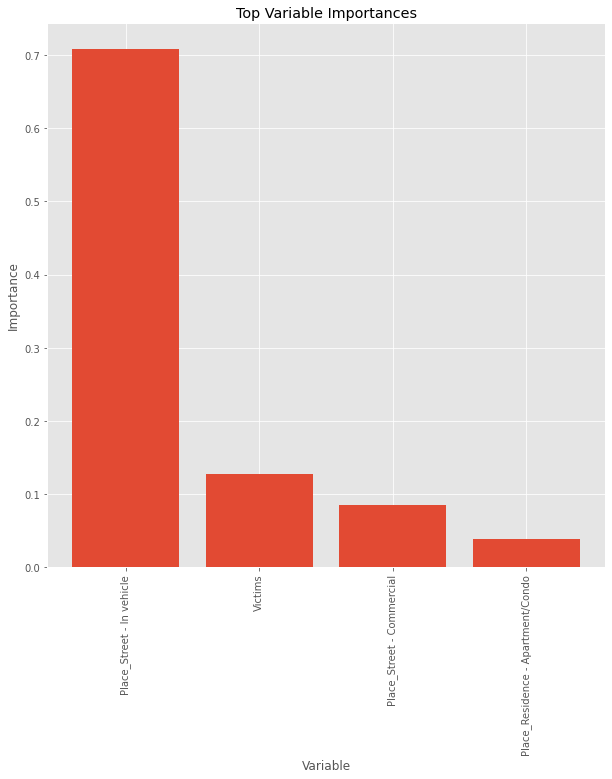

In [580]:
x_values1 = list(range(len(top_importances1)))
plt.bar(x_values1, top_importances1, orientation= 'vertical')
plt.xticks(x_values1, top_features_list1, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Confusion matrix, without normalization


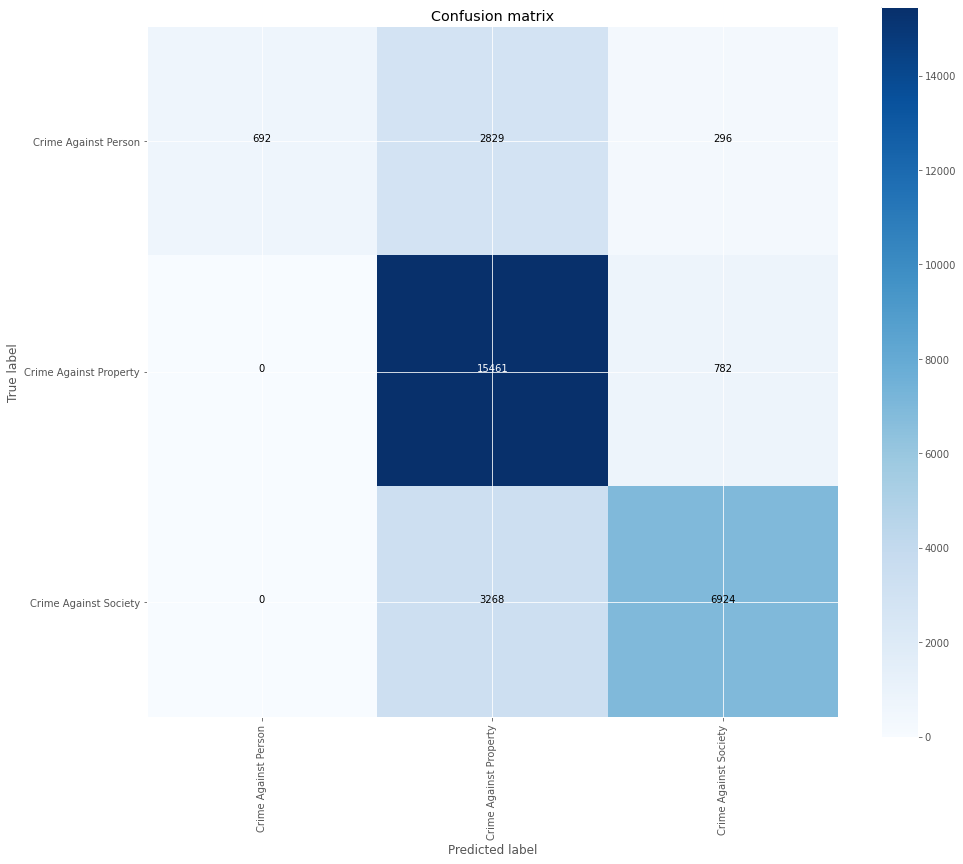

In [496]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(np.argmax(test_labels_gen3, axis=1), np.argmax(predictions_gen3, axis=1))

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(10, 10, forward=True)
#fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(top_classes_gen), normalize=False,
                      title='Confusion matrix')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


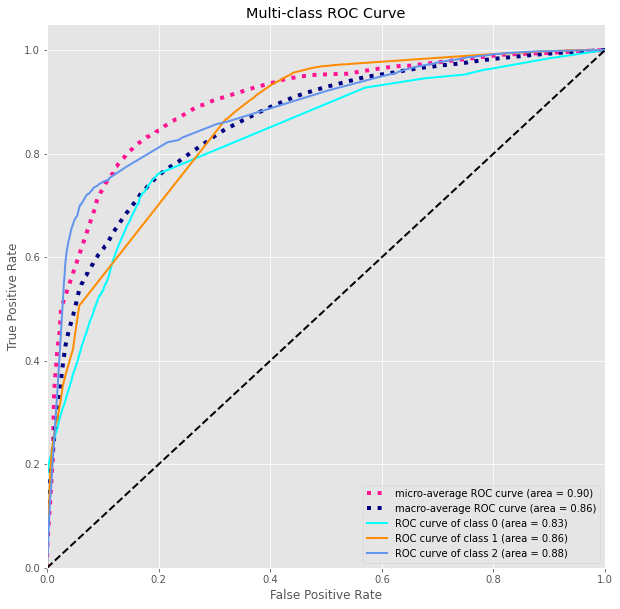

In [593]:
getROCdata(top_classes_gen,test_labels_gen3,predictions_gen3)

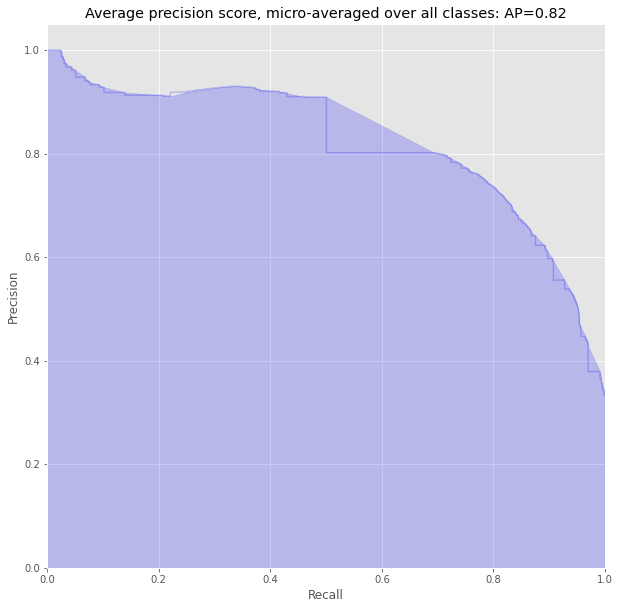

In [565]:
plotPrecision(recall_gen3,precision_gen3,average_precision_gen3)

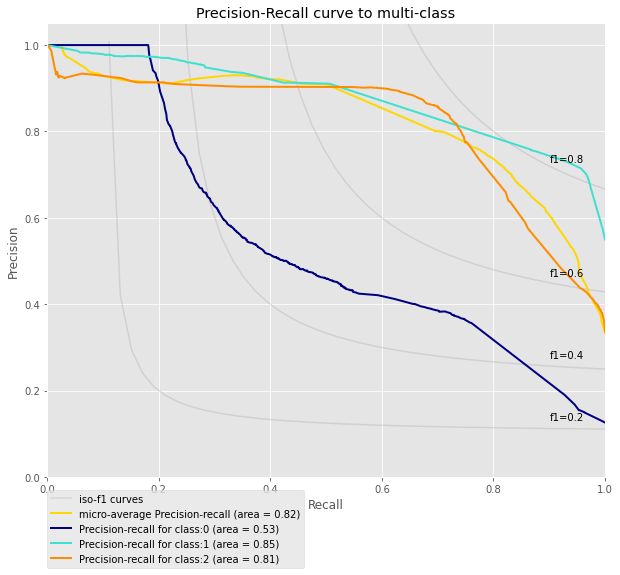

In [569]:
plotPrecisionRecall(top_classes_gen,recall_gen3,precision_gen3,average_precision_gen3)

#### Predicting More Specific Crimes

In [587]:
best_model_spec3.fit(test_spec3, test_labels_spec3)

RandomForestClassifier(bootstrap=False, max_depth=13, max_features=0.6,
                       max_leaf_nodes=16, min_samples_split=5, n_estimators=161,
                       random_state=4)

In [588]:
importances1 = list(best_model_spec3.feature_importances_)
feature_list1 = list(features3.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances1]

Variable: Place_Street - In vehicle                Importance: 0.37173909760828144
Variable: Place_Other/Unknown                      Importance: 0.1683931535177574
Variable: Place_Retail - Department/Discount Store Importance: 0.09153455070439553
Variable: Place_Residence - Single Family          Importance: 0.08401117002053568
Variable: Place_Residence - Apartment/Condo        Importance: 0.08120407632488982
Variable: Place_Residence - Driveway               Importance: 0.04664728627178846
Variable: Place_Residence -Townhouse/Duplex        Importance: 0.04513315217335311
Variable: Place_Parking Lot - Residential          Importance: 0.03175758294993602
Variable: Place_Street - Commercial                Importance: 0.022243914130005614
Variable: Victims                                  Importance: 0.021974034381223334
Variable: Place_Street - Residential               Importance: 0.02012283058803559
Variable: Place_Parking Lot - Commercial           Importance: 0.012212143754358643
Va

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [589]:
top_importances1 = []
top_features_list1 = []

for x,y in feature_importances1:
    if(y > 0.025):
        top_features_list1.append(x)
        top_importances1.append(y)
top_features_list1

['Place_Street - In vehicle',
 'Place_Other/Unknown',
 'Place_Retail - Department/Discount Store',
 'Place_Residence - Single Family',
 'Place_Residence - Apartment/Condo',
 'Place_Residence - Driveway',
 'Place_Residence -Townhouse/Duplex',
 'Place_Parking Lot - Residential']

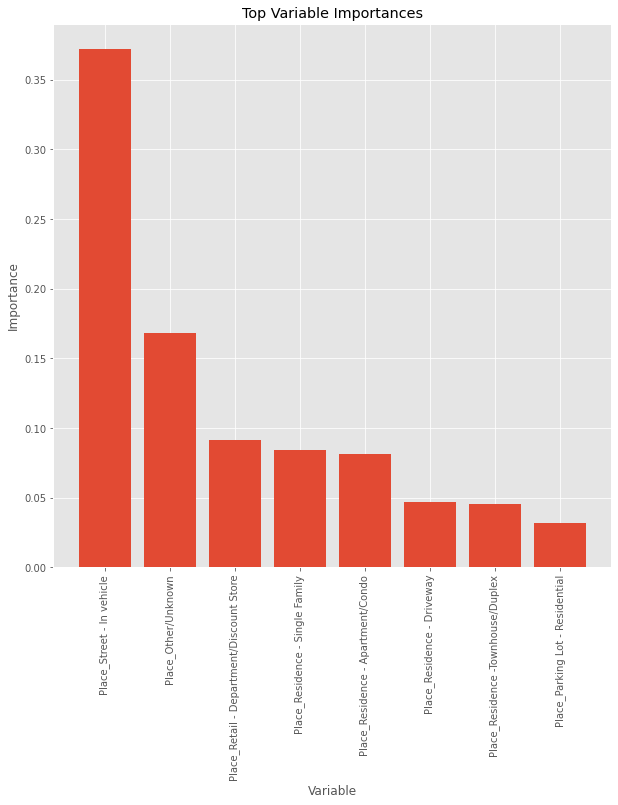

In [590]:
x_values1 = list(range(len(top_importances1)))
plt.bar(x_values1, top_importances1, orientation= 'vertical')
plt.xticks(x_values1, top_features_list1, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Confusion matrix, without normalization


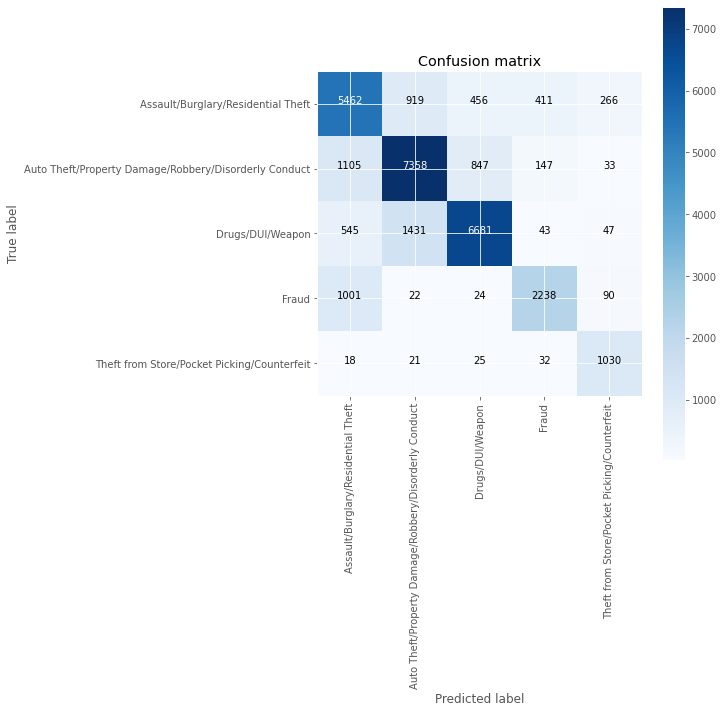

In [592]:
cnf_matrix = confusion_matrix(np.argmax(test_labels_spec3, axis=1), np.argmax(predictions_spec3, axis=1))

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(10, 10, forward=True)
#fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(top_classes_spec), normalize=False,
                      title='Confusion matrix')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


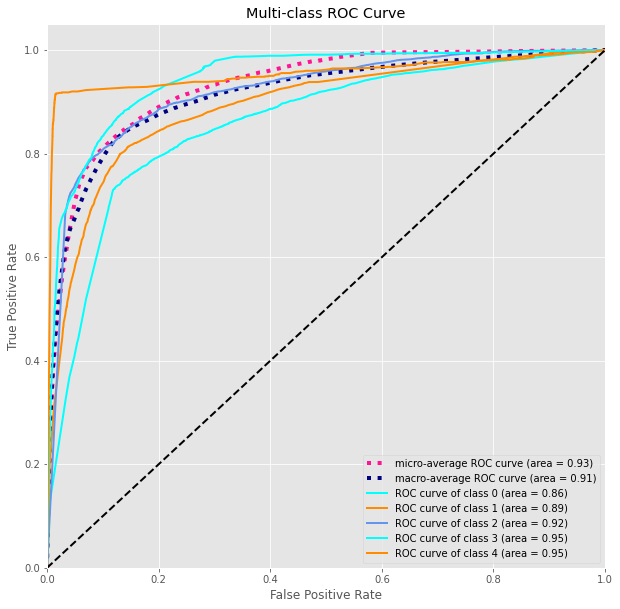

In [594]:
getROCdata(top_classes_spec,test_labels_spec3,predictions_spec3)

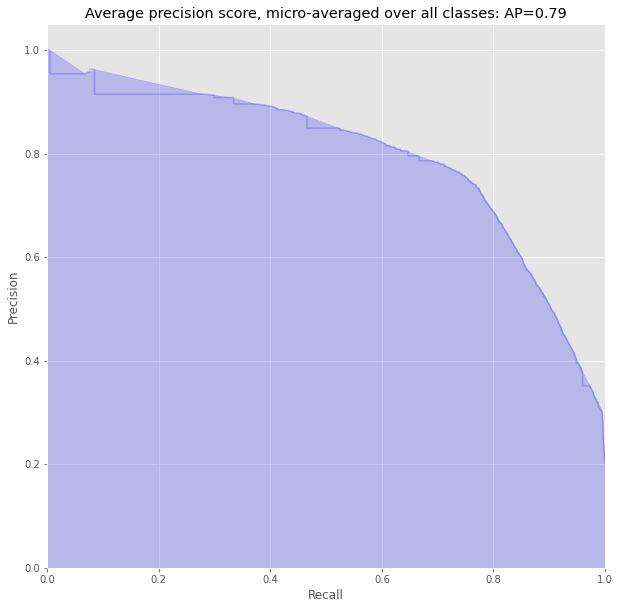

In [596]:
plotPrecision(recall_spec3,precision_spec3,average_precision_spec3)

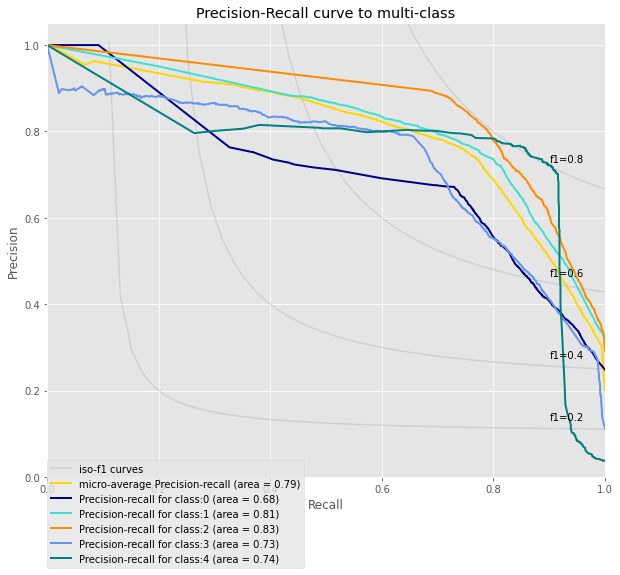

In [597]:
plotPrecisionRecall(top_classes_spec,recall_spec3,precision_spec3,average_precision_spec3)

### Part 4B: Can we Outperform the Random Forest Models Fitted to the Abridged Dataset by using Gradient Boosted Models on the Entire Dataset?

In [606]:
le = preprocessing.LabelEncoder()

data1['Crime Name1']= le.fit_transform(data1['Crime Name1'])
labels_xgb_gen = np.array(data1['Crime Name1'])

data1['Crime Type']= le.fit_transform(data1['Crime Type'])
labels_xgb_spec = np.array(data1['Crime Type'])

train_gen1_xgb, test_gen1_xgb, train_labels_gen1_xgb, test_labels_gen1_xgb = train_test_split(features1, labels_xgb_gen, test_size=0.25, random_state=4)
train_spec1_xgb, test_spec1_xgb, train_labels_spec1_xgb, test_labels_spec1_xgb = train_test_split(features1, labels_xgb_spec, test_size=0.25, random_state=4)


#### Predicting Crimes Against Society, Persons, and Property

In [607]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

xgb = XGBClassifier(random_state=4, eval_metric='mlogloss', use_label_encoder=False)

param_grid2 = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': [None] + list(np.linspace(3,20).astype(int)),
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree' : [0.3, 0.5, 0.7]
}

rs2 = RandomizedSearchCV(xgb, param_grid2, cv=3,n_iter=5, random_state=4)

In [608]:
rs2.fit(train_gen1_xgb, train_labels_gen1_xgb)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7],
                                        'learning_rate': [0.01, 0.05, 0.1],
                            

In [609]:
print(rs2.best_params_)

{'n_estimators': 126, 'max_depth': 17, 'learning_rate': 0.01, 'colsample_bytree': 0.7}


In [612]:
best_model_xgb = rs2.best_estimator_
best_model_xgb.fit(train_gen1_xgb,train_labels_gen1_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=17, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=126, n_jobs=28,
              num_parallel_tree=1, objective='multi:softprob', random_state=4,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [654]:
predictions_gen1_xgb = best_model_xgb.predict(test_gen1_xgb)

accuracy_score(test_labels_gen1_xgb, predictions_gen1_xgb)

0.7454155591789328

In [666]:
importances2 = list(best_model_xgb.feature_importances_)
feature_list2 = list(features1.columns)
feature_importances2 = [(feature, importance) for feature, importance in zip(feature_list2,importances2)]
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse=True)

In [615]:
top_features_list2 = []
top_importances2 = []

for x,y in feature_importances2:
    if(y > 0.025):
        top_features_list2.append(x)
        top_importances2.append(y)

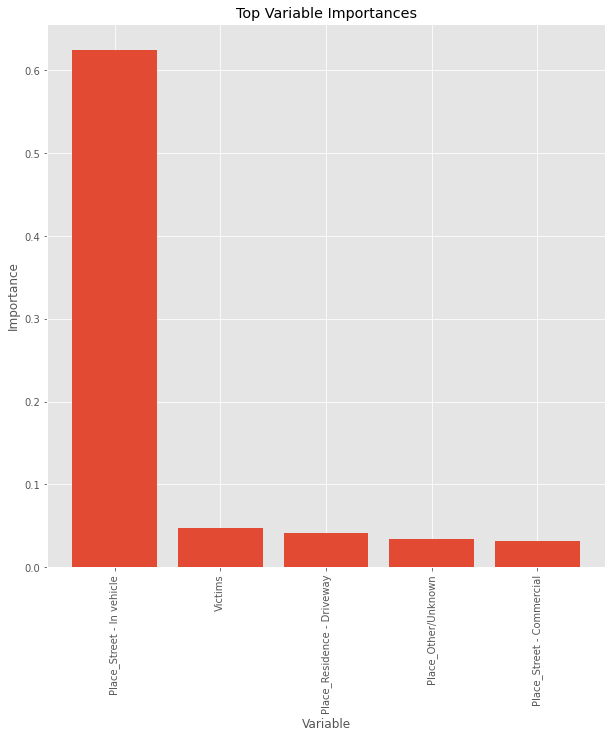

In [616]:
x_values2 = list(range(len(top_importances2)))
plt.bar(x_values2, top_importances2, orientation= 'vertical')
plt.xticks(x_values2, top_features_list2, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

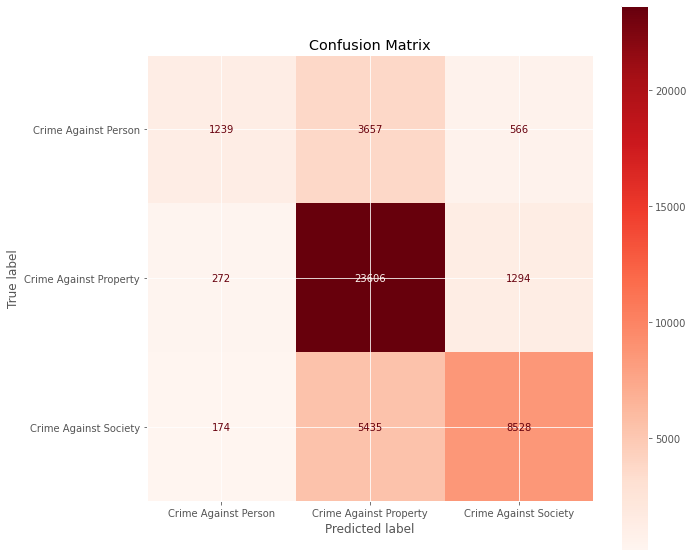

In [619]:
from sklearn.metrics import plot_confusion_matrix as plot_cm

plot_cm(best_model_xgb, test_gen1_xgb, test_labels_gen1_xgb, display_labels=top_classes_gen, cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [627]:
predictions_gen1_xgb2 = best_model_xgb.predict_proba(test_gen1_xgb)

In [628]:
import tensorflow as tf

test_labels_gen1_xgb2 = tf.keras.utils.to_categorical(test_labels_gen1_xgb)

test_labels_gen1_xgb2[:,1]

array([0., 1., 1., ..., 0., 1., 0.], dtype=float32)

In [630]:
macro_roc_auc_ovo = roc_auc_score(test_labels_gen1_xgb2, predictions_gen1_xgb2, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(test_labels_gen1_xgb2, predictions_gen1_xgb2, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(test_labels_gen1_xgb2, predictions_gen1_xgb2, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(test_labels_gen1_xgb2, predictions_gen1_xgb2, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.851912 (macro),
0.859201 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.851912 (macro),
0.859201 (weighted by prevalence)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


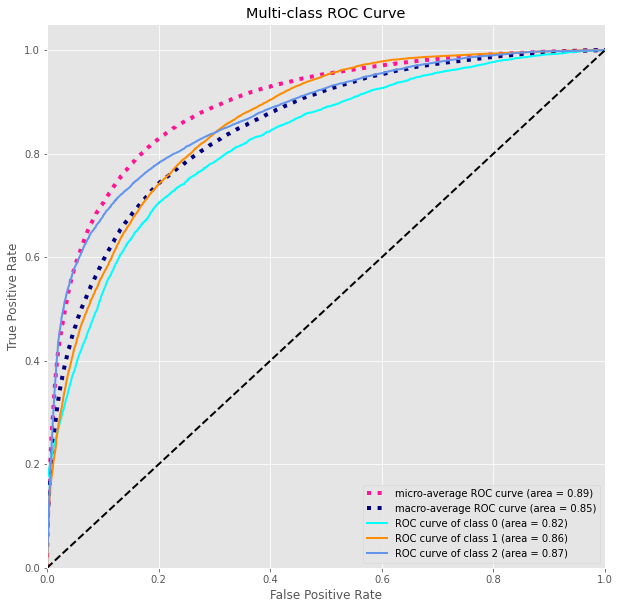

In [629]:
getROCdata(top_classes_gen,test_labels_gen1_xgb2,predictions_gen1_xgb2)

In [631]:
# For each class
precision_gen1_xgb = dict()
recall_gen1_xgb = dict()
average_precision_gen1_xgb = dict()
for i in range(len(top_classes_gen)):
    precision_gen1_xgb[i], recall_gen1_xgb[i], _ = precision_recall_curve(test_labels_gen1_xgb2[:, i],
                                                        predictions_gen1_xgb2[:, i])
    average_precision_gen1_xgb[i] = average_precision_score(test_labels_gen1_xgb2[:, i], predictions_gen1_xgb2[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_gen1_xgb["micro"], recall_gen1_xgb["micro"], _ = precision_recall_curve(test_labels_gen1_xgb2.ravel(),
    predictions_gen1_xgb2.ravel())
average_precision_gen1_xgb["micro"] = average_precision_score(test_labels_gen1_xgb2, predictions_gen1_xgb2,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_gen1_xgb["micro"]))

Average precision score, micro-averaged over all classes: 0.83


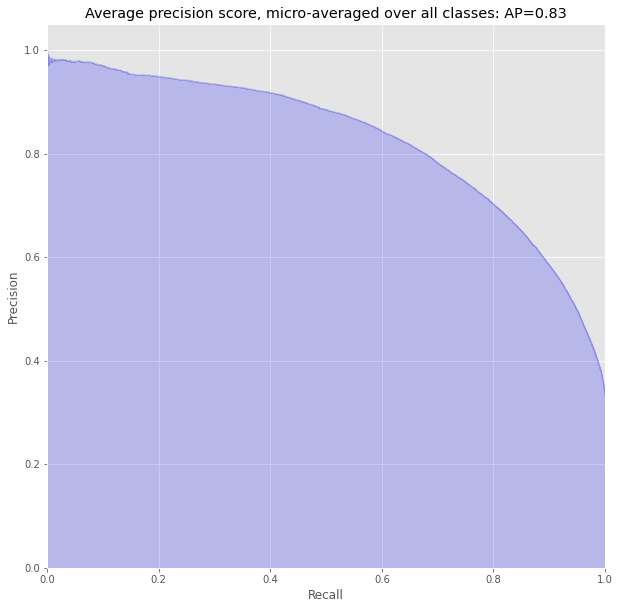

In [632]:
plotPrecision(recall_gen1_xgb,precision_gen1_xgb,average_precision_gen1_xgb)

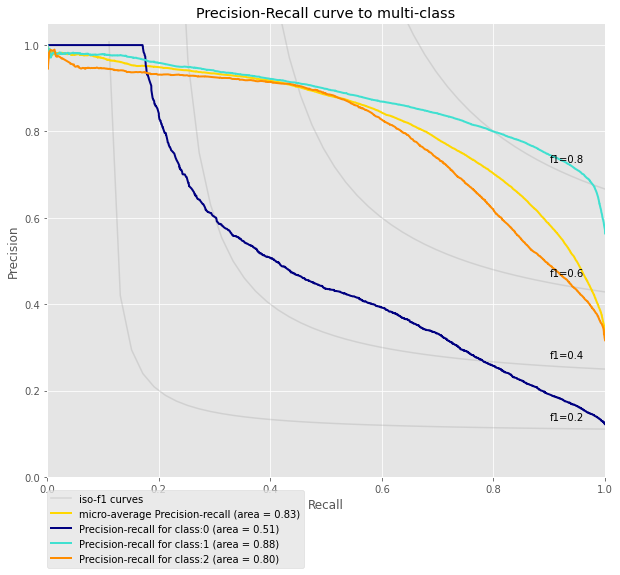

In [633]:
plotPrecisionRecall(top_classes_gen,recall_gen1_xgb,precision_gen1_xgb,average_precision_gen1_xgb)

In [634]:
lgbm = LGBMClassifier(random_state=4)

param_grid3 = {'n_estimators': np.linspace(0,200).astype(int),
              'max_depth': [None] + list(np.linspace(3,20).astype(int)),
              'learning_rate': [0.01, 0.1, 0.2],
               'bagging_fraction': [0.5,0.7,0.9],
               'feature_fraction': [0.5,0.7,0.9],
              }

rs3 = RandomizedSearchCV(lgbm, param_grid3, cv=3, n_iter=5)

In [650]:
rs3.fit(train_gen1_xgb, train_labels_gen1_xgb)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fractio

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=4), n_iter=5,
                   param_distributions={'bagging_fraction': [0.5, 0.7, 0.9],
                                        'feature_fraction': [0.5, 0.7, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'n_estimators': array([  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
        53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 102,
       106, 110, 114, 118, 122, 126, 130, 134, 138, 142, 146, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 200])})

In [636]:
print(rs3.best_params_)

{'n_estimators': 69, 'max_depth': 13, 'learning_rate': 0.1, 'feature_fraction': 0.7, 'bagging_fraction': 0.5}


In [653]:
best_model_lgbm = rs3.best_estimator_
best_model_lgbm.fit(train_gen1_xgb, train_labels_gen1_xgb)

LGBMClassifier(bagging_fraction=0.5, feature_fraction=0.7, learning_rate=0.2,
               max_depth=13, n_estimators=122, random_state=4)

In [655]:
predictions_gen1_lgbm = best_model_lgbm.predict(test_gen1_xgb)

accuracy_score(test_labels_gen1_xgb, predictions_gen1_lgbm)

0.7514015769136271

In [656]:
best_model_lgbm.feature_importances_

array([  88, 1042, 1073,  938,  987,  989, 1080,  868,   24,   27,   31,
         37,   36,   47,   17,   18,   25,   54,   27,   50,   25,   18,
         30,   12,   42,   72,   40,   47,   34,    0,   18,   13,   29,
         21,    0,   82,   60,   36,   48,   14,   38,   53,    9,   78,
         27,    8,   32,   27,   18,   89,   24,   11,    0,    7,   41,
         19,   87,   33,   20,   66,   28,   10,   45,   76,   31,  115,
         56,   80,   62,   36,   15,   41,   63,   43,    9,   30,   23,
         38,   71,   18,   23,    8,  114,   40,   64,   72,  114,   80,
        121,    5,   33,   83,   54,   69,   94,    0,  136,  108,    0,
         86], dtype=int32)

In [667]:
lgbm_importances = best_model_lgbm.feature_importances_/sum(best_model_lgbm.feature_importances_)
importances3 = list(lgbm_importances)
feature_list3 = list(features1.columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)

In [658]:
top_features_list3 = []
top_importances3 = []

for x,y in feature_importances3:
    if(y > 0.025):
        top_features_list3.append(x)
        top_importances3.append(y)

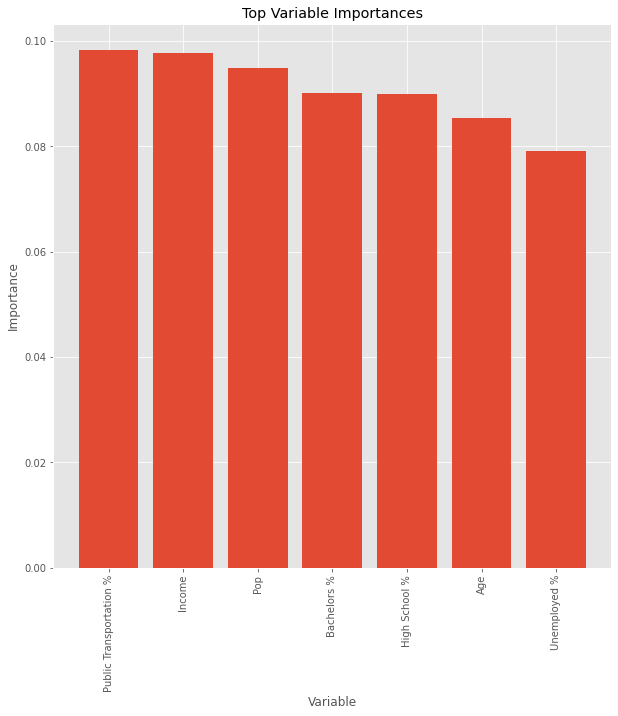

In [659]:
x_values3 = list(range(len(top_importances3)))
plt.bar(x_values3, top_importances3, orientation= 'vertical')
plt.xticks(x_values3, top_features_list3, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

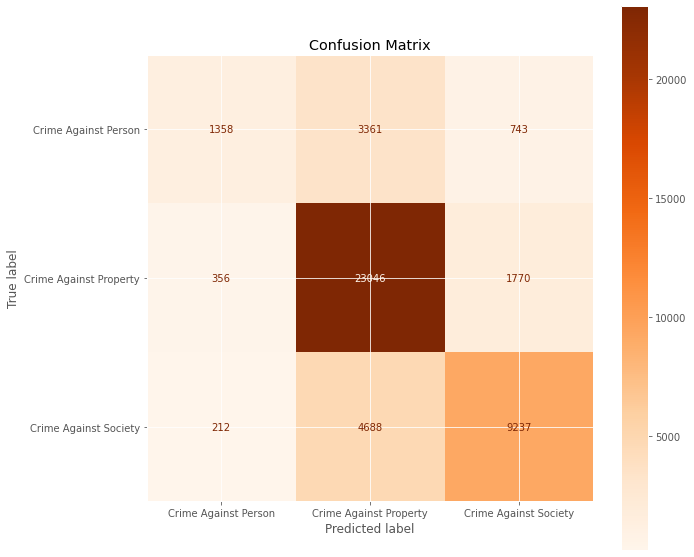

In [661]:
plot_cm(best_model_lgbm, test_gen1_xgb, test_labels_gen1_xgb, display_labels=top_classes_gen, cmap=plt.cm.Oranges)
plt.title('Confusion Matrix')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [662]:
predictions_gen1_lgbm2 = best_model_lgbm.predict_proba(test_gen1_xgb)

In [663]:
macro_roc_auc_ovo = roc_auc_score(test_labels_gen1_xgb2, predictions_gen1_lgbm2, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(test_labels_gen1_xgb2, predictions_gen1_lgbm2, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(test_labels_gen1_xgb2, predictions_gen1_lgbm2, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(test_labels_gen1_xgb2, predictions_gen1_lgbm2, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.856328 (macro),
0.863748 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.856328 (macro),
0.863748 (weighted by prevalence)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


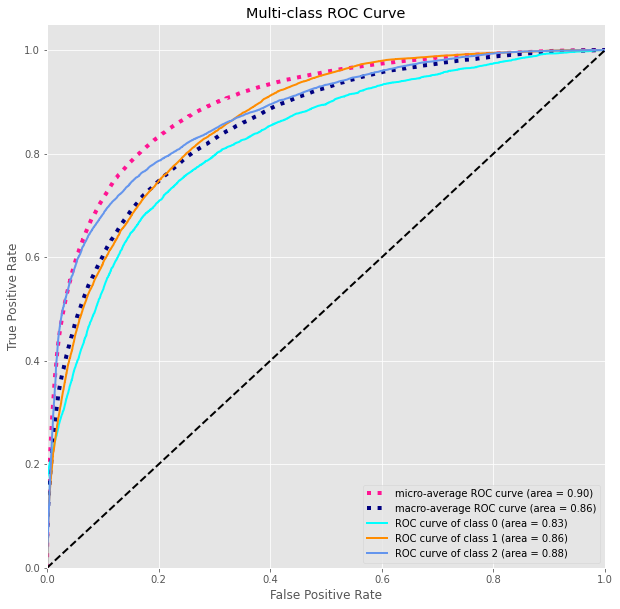

In [664]:
getROCdata(top_classes_gen,test_labels_gen1_xgb2,predictions_gen1_lgbm2)

In [665]:
# For each class
precision_gen1_lgbm = dict()
recall_gen1_lgbm = dict()
average_precision_gen1_lgbm = dict()
for i in range(len(top_classes_gen)):
    precision_gen1_lgbm[i], recall_gen1_lgbm[i], _ = precision_recall_curve(test_labels_gen1_xgb2[:, i],
                                                        predictions_gen1_lgbm2[:, i])
    average_precision_gen1_lgbm[i] = average_precision_score(test_labels_gen1_xgb2[:, i], predictions_gen1_lgbm2[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_gen1_lgbm["micro"], recall_gen1_lgbm["micro"], _ = precision_recall_curve(test_labels_gen1_xgb2.ravel(),
    predictions_gen1_lgbm2.ravel())
average_precision_gen1_lgbm["micro"] = average_precision_score(test_labels_gen1_xgb2, predictions_gen1_lgbm2,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_gen1_xgb["micro"]))

Average precision score, micro-averaged over all classes: 0.83


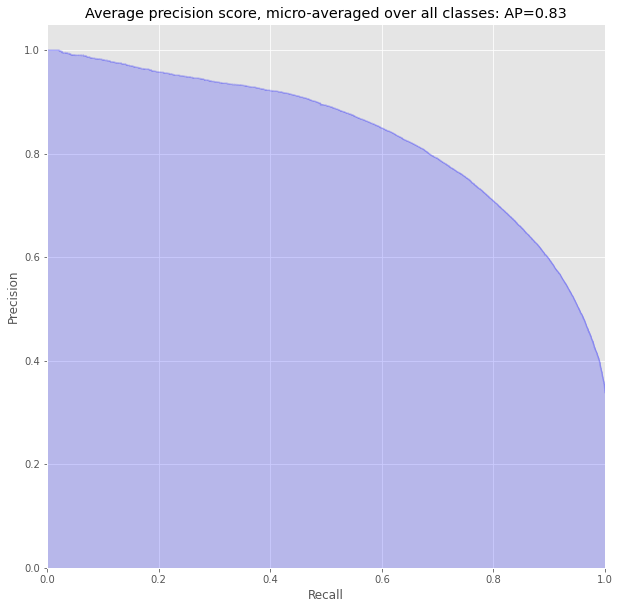

In [668]:
plotPrecision(recall_gen1_lgbm,precision_gen1_lgbm,average_precision_gen1_lgbm)

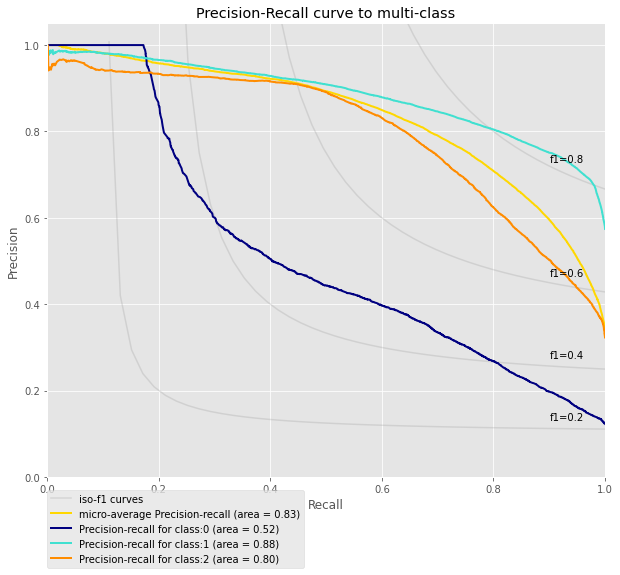

In [669]:
plotPrecisionRecall(top_classes_gen,recall_gen1_lgbm,precision_gen1_lgbm,average_precision_gen1_lgbm)

#### Predicting More Specific Crimes

In [670]:
rs2.fit(train_spec1_xgb, train_labels_spec1_xgb)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7],
                                        'learning_rate': [0.01, 0.05, 0.1],
                            

In [671]:
print(rs2.best_params_)

{'n_estimators': 60, 'max_depth': 14, 'learning_rate': 0.05, 'colsample_bytree': 0.5}


In [672]:
best_model_xgb = rs2.best_estimator_
best_model_xgb.fit(train_spec1_xgb,train_labels_spec1_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=14, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=60, n_jobs=28,
              num_parallel_tree=1, objective='multi:softprob', random_state=4,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [673]:
predictions_spec1_xgb = best_model_xgb.predict(test_spec1_xgb)

accuracy_score(test_labels_spec1_xgb, predictions_spec1_xgb)

0.7013468539903063

In [674]:
importances2 = list(best_model_xgb.feature_importances_)
feature_list2 = list(features1.columns)
feature_importances2 = [(feature, importance) for feature, importance in zip(feature_list2,importances2)]
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse=True)

In [675]:
top_features_list2 = []
top_importances2 = []

for x,y in feature_importances2:
    if(y > 0.025):
        top_features_list2.append(x)
        top_importances2.append(y)

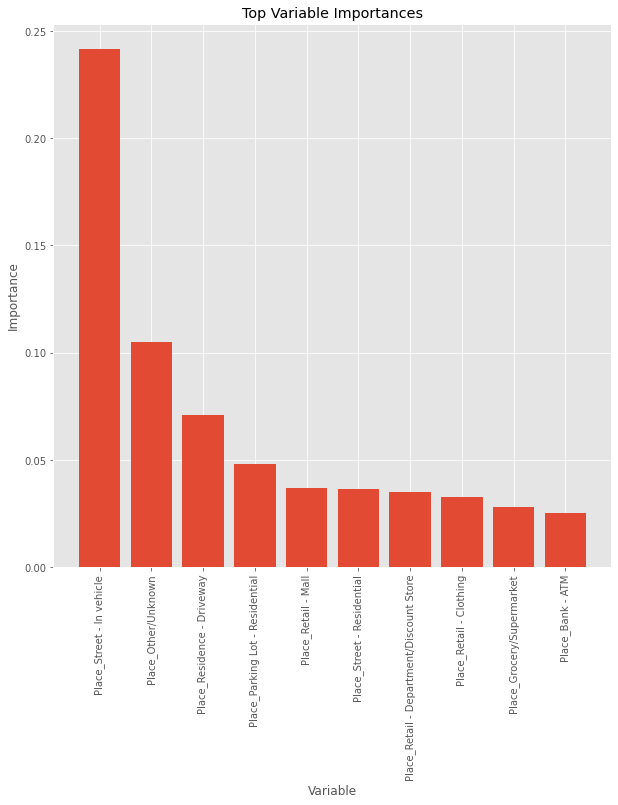

In [676]:
x_values2 = list(range(len(top_importances2)))
plt.bar(x_values2, top_importances2, orientation= 'vertical')
plt.xticks(x_values2, top_features_list2, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

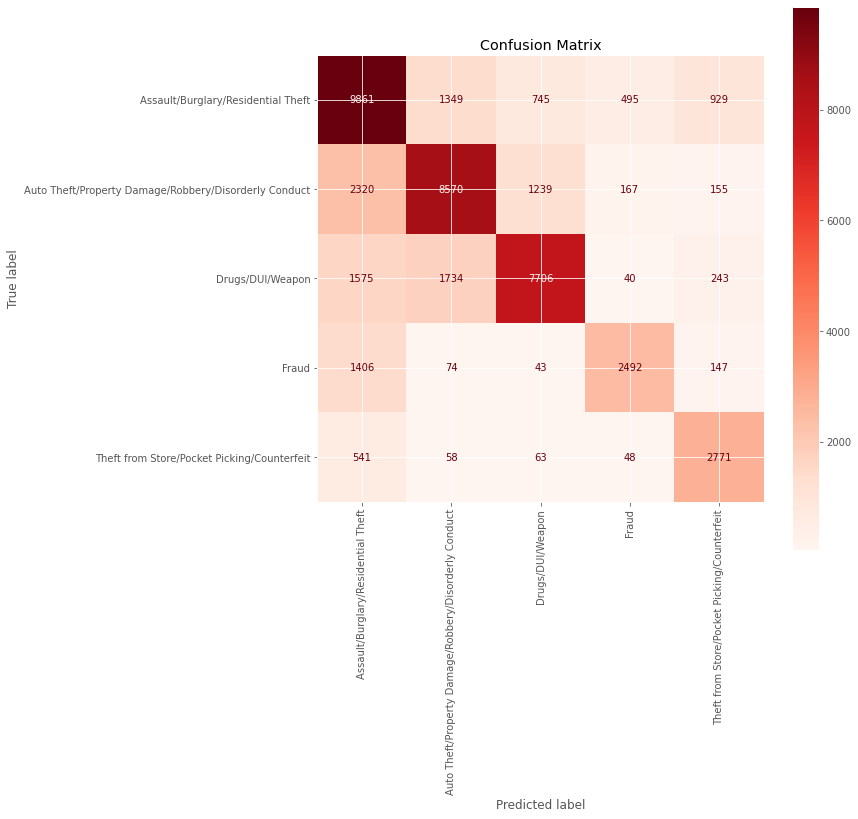

In [678]:
from sklearn.metrics import plot_confusion_matrix as plot_cm

plot_cm(best_model_xgb, test_spec1_xgb, test_labels_spec1_xgb, display_labels=top_classes_spec, cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [679]:
predictions_spec1_xgb2 = best_model_xgb.predict_proba(test_spec1_xgb)

In [680]:
import tensorflow as tf

test_labels_spec1_xgb2 = tf.keras.utils.to_categorical(test_labels_spec1_xgb)

test_labels_spec1_xgb2[:,1]

array([1., 0., 1., ..., 0., 1., 0.], dtype=float32)

In [681]:
macro_roc_auc_ovo = roc_auc_score(test_labels_spec1_xgb2, predictions_spec1_xgb2, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(test_labels_spec1_xgb2, predictions_spec1_xgb2, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(test_labels_spec1_xgb2, predictions_spec1_xgb2, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(test_labels_spec1_xgb2, predictions_spec1_xgb2, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.901096 (macro),
0.882481 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.901096 (macro),
0.882481 (weighted by prevalence)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


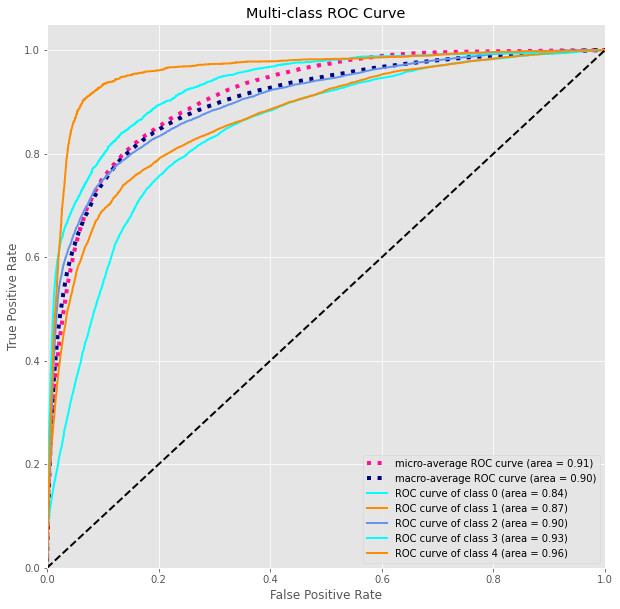

In [682]:
getROCdata(top_classes_spec,test_labels_spec1_xgb2,predictions_spec1_xgb2)

In [684]:
# For each class
precision_spec1_xgb = dict()
recall_spec1_xgb = dict()
average_precision_spec1_xgb = dict()
for i in range(len(top_classes_spec)):
    precision_spec1_xgb[i], recall_spec1_xgb[i], _ = precision_recall_curve(test_labels_spec1_xgb2[:, i],
                                                        predictions_spec1_xgb2[:, i])
    average_precision_spec1_xgb[i] = average_precision_score(test_labels_spec1_xgb2[:, i], predictions_spec1_xgb2[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_spec1_xgb["micro"], recall_spec1_xgb["micro"], _ = precision_recall_curve(test_labels_spec1_xgb2.ravel(),
    predictions_spec1_xgb2.ravel())
average_precision_spec1_xgb["micro"] = average_precision_score(test_labels_spec1_xgb2, predictions_spec1_xgb2,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_spec1_xgb["micro"]))

Average precision score, micro-averaged over all classes: 0.76


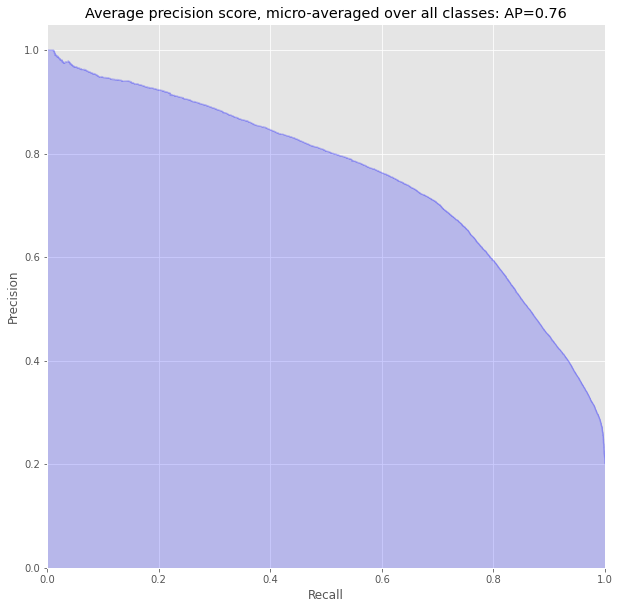

In [685]:
plotPrecision(recall_spec1_xgb,precision_spec1_xgb,average_precision_spec1_xgb)

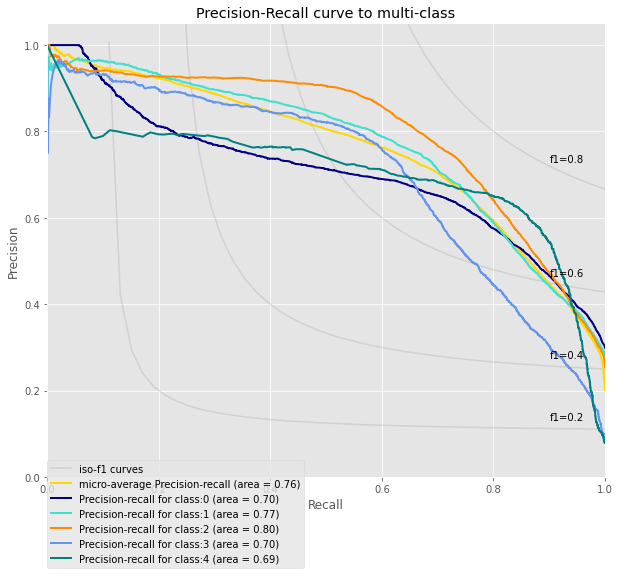

In [686]:
plotPrecisionRecall(top_classes_spec,recall_spec1_xgb,precision_spec1_xgb,average_precision_spec1_xgb)

In [687]:
rs3.fit(train_spec1_xgb, train_labels_spec1_xgb)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fractio

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=4), n_iter=5,
                   param_distributions={'bagging_fraction': [0.5, 0.7, 0.9],
                                        'feature_fraction': [0.5, 0.7, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'n_estimators': array([  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
        53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 102,
       106, 110, 114, 118, 122, 126, 130, 134, 138, 142, 146, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 200])})

In [688]:
print(rs3.best_params_)

{'n_estimators': 187, 'max_depth': 17, 'learning_rate': 0.1, 'feature_fraction': 0.9, 'bagging_fraction': 0.7}


In [689]:
best_model_lgbm = rs3.best_estimator_
best_model_lgbm.fit(train_spec1_xgb, train_labels_spec1_xgb)

LGBMClassifier(bagging_fraction=0.7, feature_fraction=0.9, max_depth=17,
               n_estimators=187, random_state=4)

In [690]:
predictions_spec1_lgbm = best_model_lgbm.predict(test_spec1_xgb)

accuracy_score(test_labels_spec1_xgb, predictions_spec1_lgbm)

0.7034240914877934

In [691]:
best_model_lgbm.feature_importances_

array([ 212, 2645, 2577, 2323, 2431, 2400, 2627, 2296,   58,  103,   73,
        106,   95,   72,   50,   83,   73,  142,  124,  135,  108,   57,
        116,   44,   74,  166,   45,   89,   75,    0,   39,   67,   91,
         62,    0,  250,  137,  155,  148,   78,   74,  171,   85,  227,
        124,   64,  158,   74,   57,  222,  125,   57,    0,   55,   59,
         54,  211,   82,   81,  231,  128,   18,   86,  156,   62,  256,
        148,  147,  131,  145,   75,  110,  188,  130,   26,  117,   75,
        134,  177,   73,   86,   37,  194,  123,  139,  211,  285,  169,
        279,   42,   77,  233,  140,  135,  206,    0,  228,  236,    0,
        211], dtype=int32)

In [692]:
lgbm_importances = best_model_lgbm.feature_importances_/sum(best_model_lgbm.feature_importances_)
importances3 = list(lgbm_importances)
feature_list3 = list(features1.columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)

In [693]:
top_features_list3 = []
top_importances3 = []

for x,y in feature_importances3:
    if(y > 0.025):
        top_features_list3.append(x)
        top_importances3.append(y)

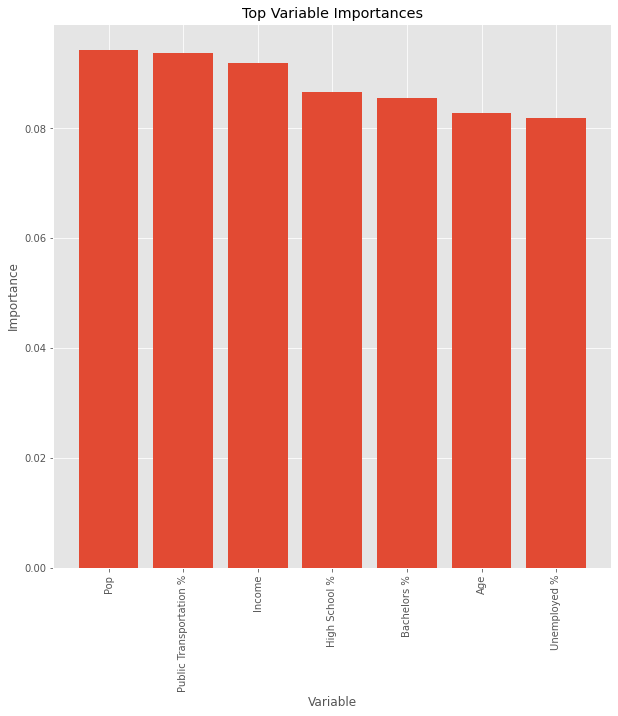

In [694]:
x_values3 = list(range(len(top_importances3)))
plt.bar(x_values3, top_importances3, orientation= 'vertical')
plt.xticks(x_values3, top_features_list3, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

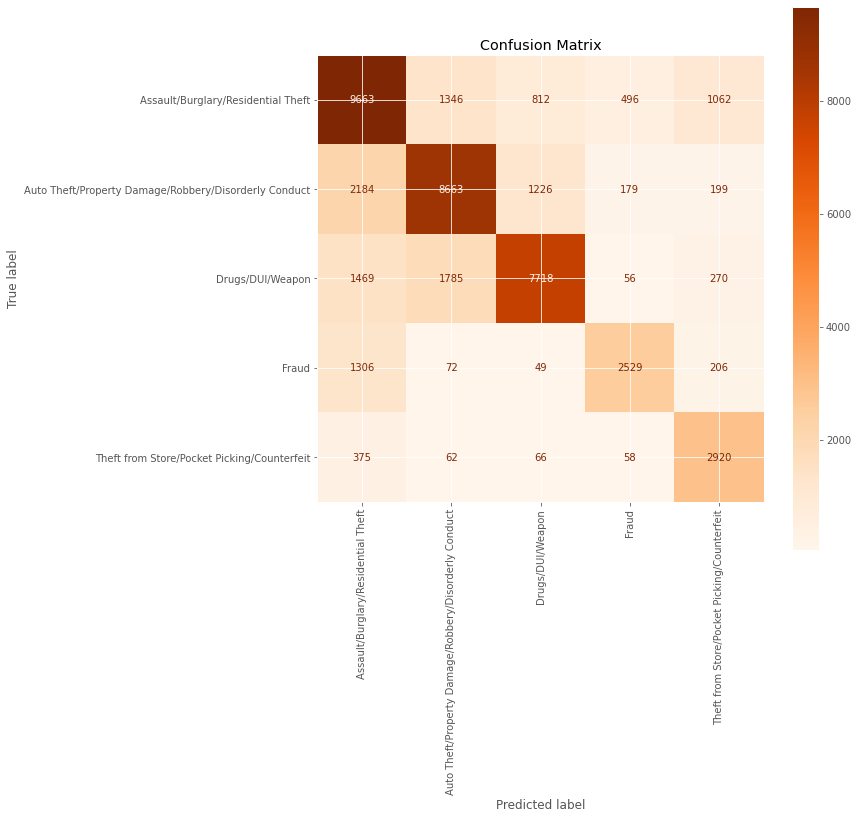

In [705]:
plot_cm(best_model_lgbm, test_spec1_xgb, test_labels_spec1_xgb, display_labels=top_classes_spec, cmap=plt.cm.Oranges)
plt.title('Confusion Matrix')
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(10,10)
plt.show()

In [696]:
predictions_spec1_lgbm2 = best_model_lgbm.predict_proba(test_spec1_xgb)

In [697]:
macro_roc_auc_ovo = roc_auc_score(test_labels_spec1_xgb2, predictions_spec1_lgbm2, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(test_labels_spec1_xgb2, predictions_spec1_lgbm2, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(test_labels_spec1_xgb2, predictions_spec1_lgbm2, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(test_labels_spec1_xgb2, predictions_spec1_lgbm2, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.906246 (macro),
0.887321 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.906246 (macro),
0.887321 (weighted by prevalence)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


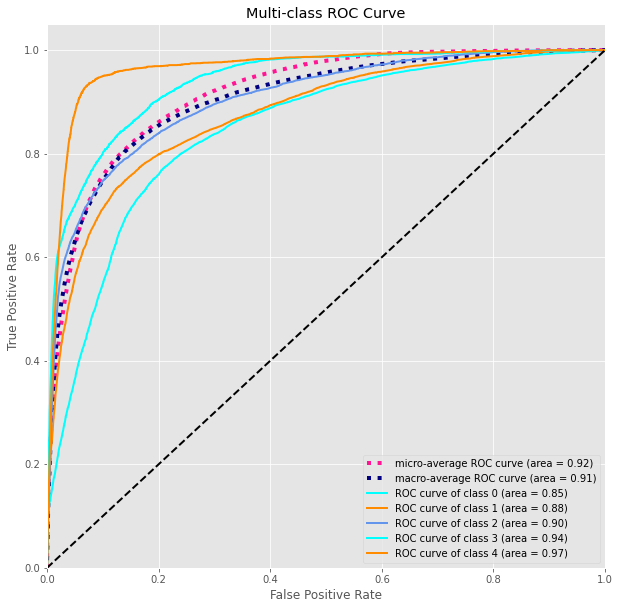

In [698]:
getROCdata(top_classes_spec,test_labels_spec1_xgb2,predictions_spec1_lgbm2)

In [699]:
# For each class
precision_spec1_lgbm = dict()
recall_spec1_lgbm = dict()
average_precision_spec1_lgbm = dict()
for i in range(len(top_classes_spec)):
    precision_spec1_lgbm[i], recall_spec1_lgbm[i], _ = precision_recall_curve(test_labels_spec1_xgb2[:, i],
                                                        predictions_spec1_lgbm2[:, i])
    average_precision_spec1_lgbm[i] = average_precision_score(test_labels_spec1_xgb2[:, i], predictions_spec1_lgbm2[:, i])

# A "micro-average": quantifying score on all classes jointly
precision_spec1_lgbm["micro"], recall_spec1_lgbm["micro"], _ = precision_recall_curve(test_labels_spec1_xgb2.ravel(),
    predictions_spec1_lgbm2.ravel())
average_precision_spec1_lgbm["micro"] = average_precision_score(test_labels_spec1_xgb2, predictions_spec1_lgbm2,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision_spec1_xgb["micro"]))

Average precision score, micro-averaged over all classes: 0.76


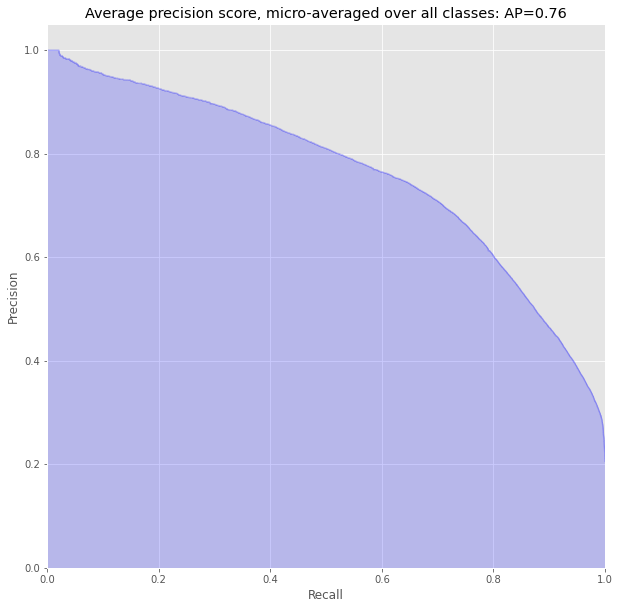

In [700]:
plotPrecision(recall_spec1_lgbm,precision_spec1_lgbm,average_precision_spec1_lgbm)

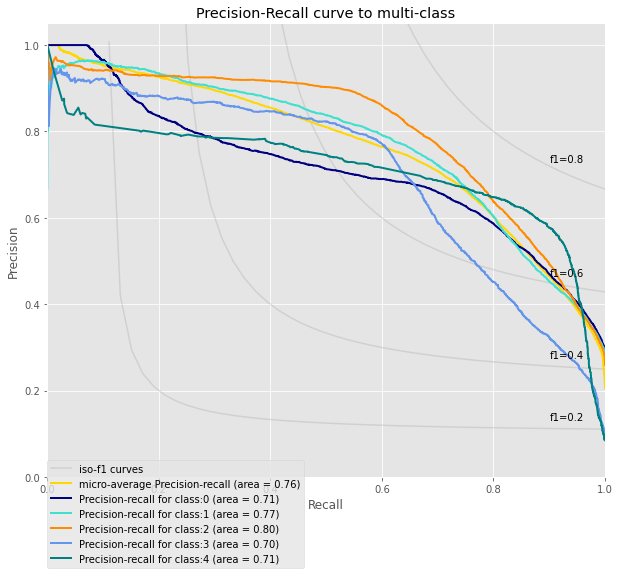

In [701]:
plotPrecisionRecall(top_classes_spec,recall_spec1_lgbm,precision_spec1_lgbm,average_precision_spec1_lgbm)

In [706]:
rs.fit(train_spec1_xgb, train_labels_spec1_xgb)

best_model_spec1 = rs.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [707]:
best_model_spec1.fit(train_spec1_xgb, train_labels_spec1_xgb)

RandomForestClassifier(bootstrap=False, max_depth=19, max_features=None,
                       max_leaf_nodes=37, min_samples_split=10,
                       n_estimators=110, random_state=4)

In [708]:
from sklearn.ensemble import VotingClassifier

estimators = [('rf', best_model_spec1),('xgbm', best_model_xgb),('lgbm',best_model_lgbm)]

ensemble = VotingClassifier(estimators, voting='hard')

ensemble.fit(train_spec1_xgb, train_labels_spec1_xgb)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=19,
                                                     max_features=None,
                                                     max_leaf_nodes=37,
                                                     min_samples_split=10,
                                                     n_estimators=110,
                                                     random_state=4)),
                             ('xgbm',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.5,
                                            eval_metric='mlogloss', gamma=0,
                                            gpu_id=-1, importance_type='...
  

In [709]:
predictions_final = ensemble.predict(test_spec1_xgb)

accuracy_score(test_labels_spec1_xgb,predictions_final)

0.7022402894730965